In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle

In [3]:
import numpy as np
import pandas as pd
from scipy.io import loadmat

In [4]:
import matplotlib.pyplot as plt

In [5]:
import scienceplots

plt.style.use(['science','ieee'])
plt.rcParams.update({'figure.dpi': '100'})

## Getting the data

In [57]:
# gNodeB's
gNB_1 = loadmat('tdoa_5g_loc/pos_gNB_1.mat')['pos_gNB_1']
gNB_2 = loadmat('tdoa_5g_loc/pos_gNB_2.mat')['pos_gNB_2']
gNB_3 = loadmat('tdoa_5g_loc/pos_gNB_3.mat')['pos_gNB_3']

# UE positions
UE_po = loadmat('tdoa_5g_loc/pos_UE_vector.mat')['pos_UE_vector']

selected_positions = np.arange(2,17)
selected_positions = np.delete(selected_positions,1) # To remove duplicate point

# Let's flatten everything
gNBs = np.array([gNB_1[:,2],gNB_2[:,2],gNB_3[:,2]])
UE = UE_po[:,selected_positions]
gNBs.shape

(3, 2)

In [58]:
file = 'tdoa_5g_loc/results/results_preoffset_30_1675640496.pickle'
with open(file, 'rb') as f:
        results = pickle.load(f)

error_nlls = results['error_nlls']
error_mean = np.array([])

for position in selected_positions:
    error_mean = np.append(error_mean, np.mean(error_nlls[f'p{position}'][0:1000]))


## Plotting

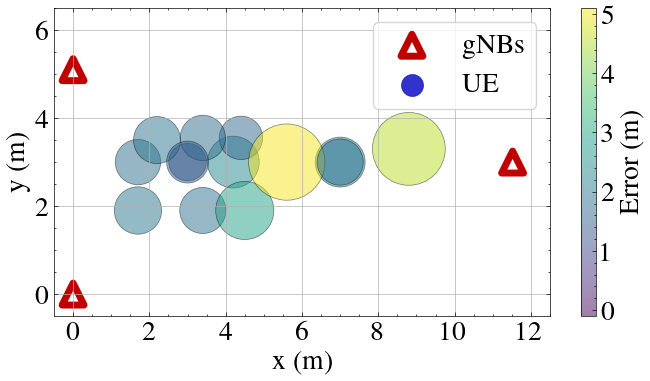

In [62]:
f, ax = plt.subplots(figsize=(8, 4))
plt.rcParams.update({'font.size': 20})

# Core plotting
gnb_sc = ax.scatter(gNBs[:,0], gNBs[:,1], s=250, marker='^', label='gNBs', facecolors=None, edgecolors='#c00000', linewidths=5)
gnb_sc.set_facecolor('none')

ax.scatter(-100, -100, s=250, marker='o', label='UE', facecolors='#0000c0', alpha=0.8, edgecolors='#0000c0', linewidths=0.5)
sc = ax.scatter(UE[0,:], UE[1,:], s=600*error_mean, c=error_mean, alpha=0.5, marker='o', edgecolor='#000000', linewidths=0.5, vmin=-0.1, vmax=5.1)

# Colorbar
cb = plt.colorbar(sc, ticks=[0,1,2,3,4,5,6])
cb.ax.set_ylabel('Error (m)', )

# Axes decorations
ax.set(xlim=(-0.5, 12.5),ylim=(-0.5,6.5))
ax.set(xlabel="x (m)", ylabel = "y (m)")
ax.set(xticks=np.arange(0,13,2),)

# Legend
ax.legend(frameon=True)
ax.grid()
plt.savefig('pics/heatmap_size.pdf', format='pdf', bbox_inches='tight')

In [56]:
UE.T

array([[7.  , 3.  ],
       [5.6 , 3.  ],
       [3.  , 3.  ],
       [1.7 , 3.  ],
       [1.7 , 1.9 ],
       [3.4 , 1.9 ],
       [4.5 , 1.9 ],
       [4.4 , 3.55],
       [3.4 , 3.55],
       [2.2 , 3.5 ],
       [3.  , 3.  ],
       [5.6 , 3.  ],
       [7.  , 3.  ],
       [8.8 , 3.3 ]])